# FBI Uniform Crime Reporting Analysis | 2012

*Author: Team members name*


## Table of Contents
1. Importing libraries
2. Importing dataset    
3. Basic Text Data Pre-processing & Cleaning Text Data
4. Preparing Data for Exploratory Data Analysis (EDA)
5. Exploratory Data Analysis
6. Feature Selection
7. Data modelling
8. Conclusion
9.  Reference


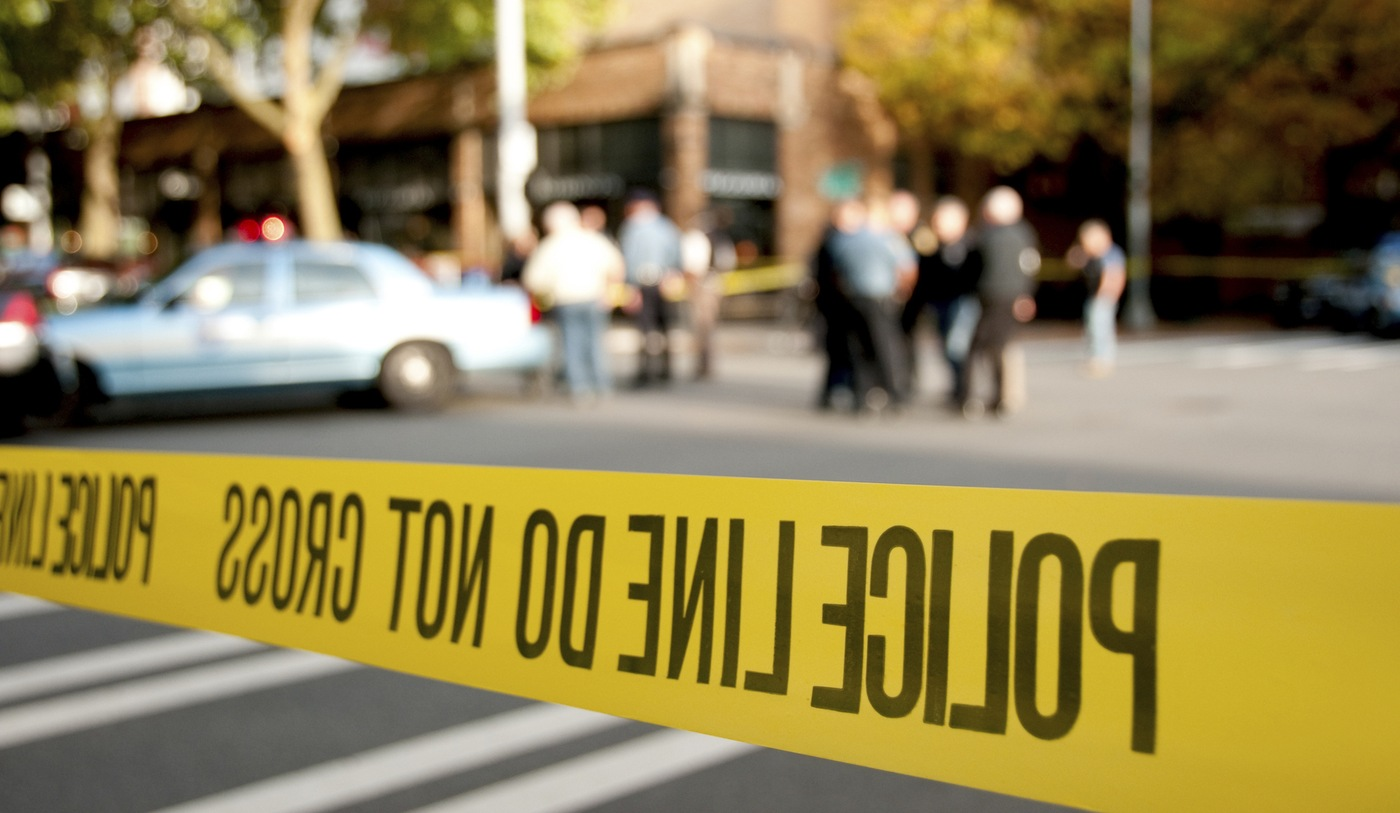

[Image Source](https://www.fbi.gov/news/stories/latest-crime-statistics-released)

># **1- Importing libraries**
---

In [25]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
import time

warnings.filterwarnings('ignore')


># **3- Importing dataset**
---

In [26]:
# Read an Excel file into a pandas DataFrame

# Ignore the first 4 rows and last 4 rows
df = pd.read_excel('dataset.xlsx', header=4)
df = df.iloc[:-4]
df.columns = df.columns.str.replace('\n', ' ')
df = df.rename(columns={'Unnamed: 0': 'State', 'Unnamed: 1': 'Agency Type', 'Unnamed: 2': 'Agency Name', 'Unnamed: 3': 'Population'})


In [27]:
df.head()

,State,Agency Type,Agency Name,Population,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation,Homicide Offenses,Murder and Nonnegligent Manslaughter,...,Gambling Offenses,Betting/ Wagering,Operating/ Promoting/ Assisting Gambling,Gambling Equipment Violations,Sports Tampering,Porno- graphy/ Obscene Material,Prost- itution Offenses,Prost- itution,Assisting or Pro- moting Prost- itution,Weapon Law Violations
0,ALABAMA,Cities,Hoover,82332.0,870.0,25.0,594.0,251.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,26.0
1,ARIZONA,Cities,Apache Junction,36986.0,559.0,96.0,381.0,82.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,25.0
2,NaN,NaN,Gilbert,214264.0,1242.0,123.0,892.0,227.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,75.0
3,NaN,Metropolitan Counties,Yuma2,NaN,555.0,94.0,376.0,85.0,26.0,26.0,...,NaN,NaN,NaN,NaN,NaN,5.0,2.0,1.0,1.0,40.0
4,ARKANSAS,Cities,Alma,5439.0,197.0,11.0,108.0,78.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0


> # **4- Basic Text Data Pre-processing**
---

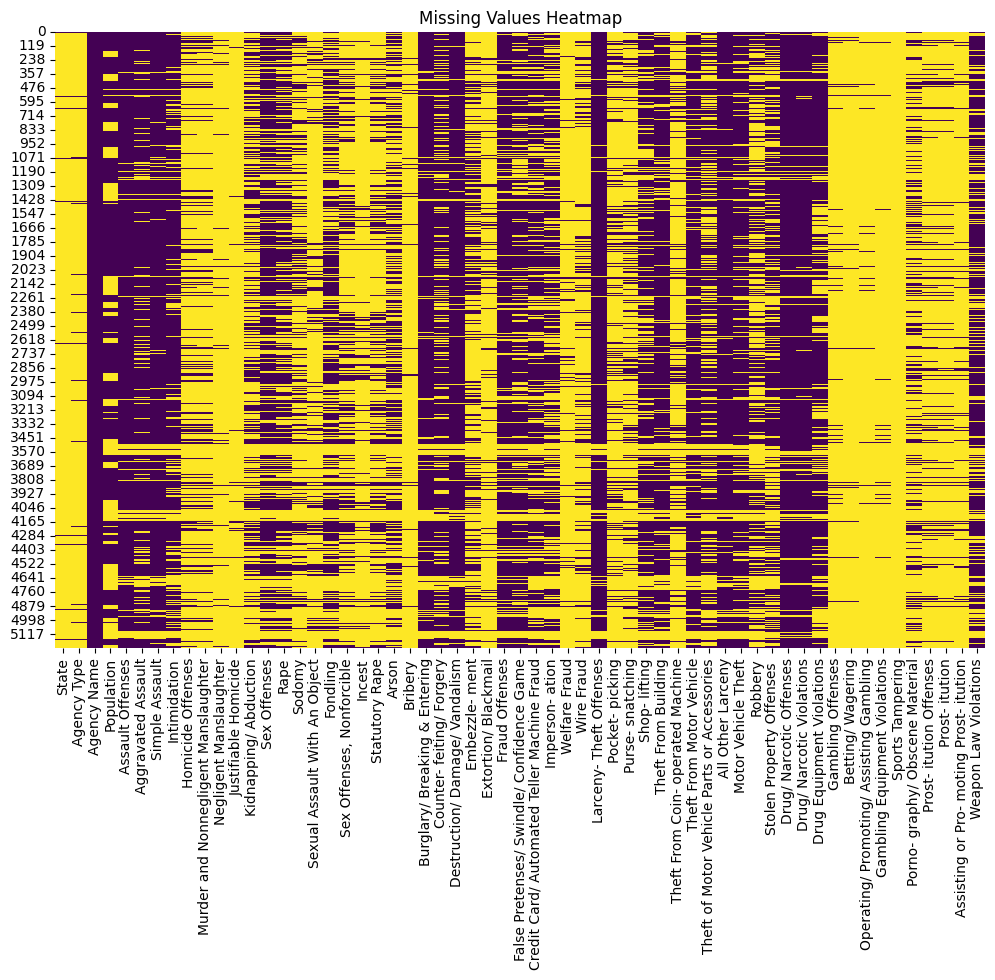

In [28]:
def plot_missing_values(df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()

plot_missing_values(df)

**Operations:**
- We found many missing values for `State` and `Agency Type` because they were nested grouping. For those we will use forward fill
- For numeric columns we will fill everything by zero because absence of crime count indicates 0 for that particular crime

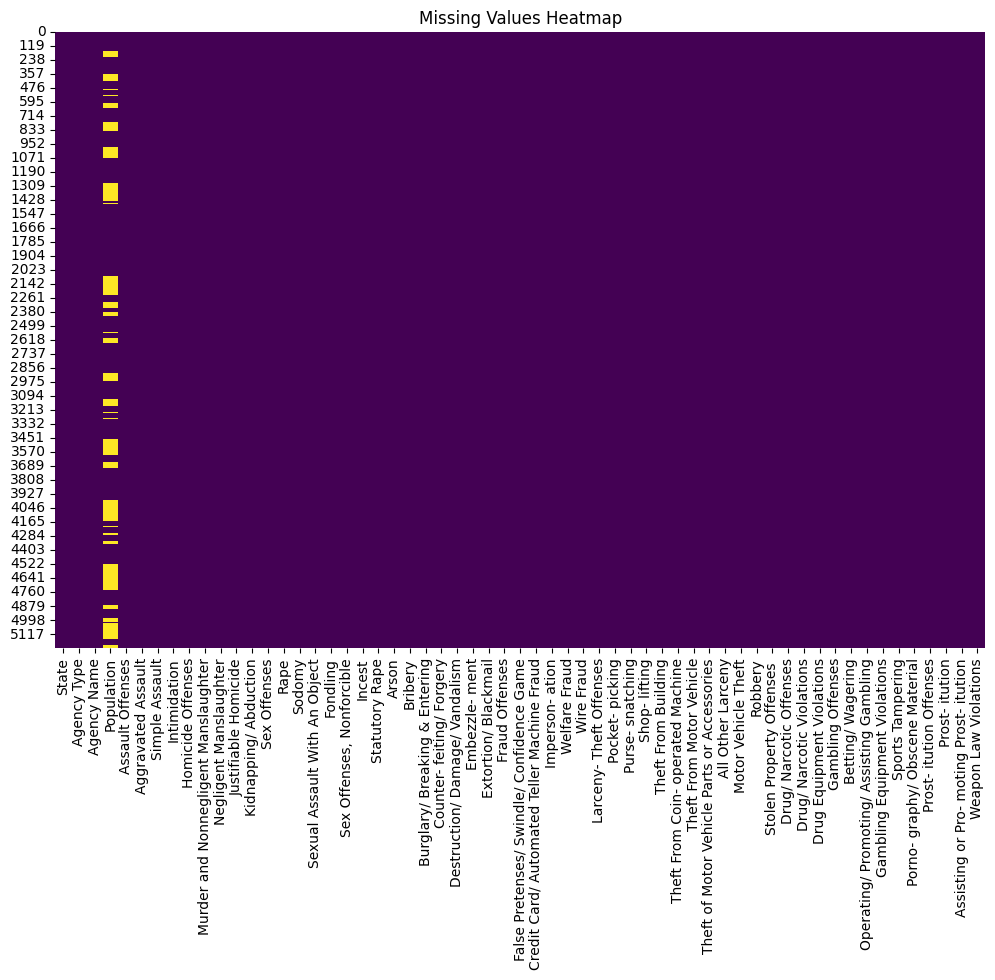

In [29]:
columns_to_ffill = ['State', 'Agency Type']
df[columns_to_ffill] = df[columns_to_ffill].ffill()
df.iloc[:, 4:] = df.iloc[:, 4:].fillna(0)
plot_missing_values(df)

> # **5- Preparing Data for Exploratory Data Analysis (EDA)**

**Operations:**
Storing the crime category information

In [30]:
grouping = {
    'Crimes Against Persons' : ['Assault Offenses',
       'Aggravated Assault', 'Simple Assault', 'Intimidation',
       'Homicide Offenses', 'Murder and Nonnegligent Manslaughter',
       'Negligent Manslaughter', 'Justifiable Homicide',
       'Kidnapping/ Abduction', 'Sex Offenses', 'Rape', 'Sodomy',
       'Sexual Assault With An Object', 'Fondling',
       'Sex Offenses, Nonforcible', 'Incest', 'Statutory Rape'],
    'Crimes Against Property' : ['Arson',
       'Bribery', 'Burglary/ Breaking & Entering', 'Counter- feiting/ Forgery',
       'Destruction/ Damage/ Vandalism', 'Embezzle- ment',
       'Extortion/ Blackmail', 'Fraud Offenses',
       'False Pretenses/ Swindle/ Confidence Game',
       'Credit Card/ Automated Teller Machine Fraud', 'Imperson- ation',
       'Welfare Fraud', 'Wire Fraud', 'Larceny- Theft Offenses',
       'Pocket- picking', 'Purse- snatching', 'Shop- lifting',
       'Theft From Building', 'Theft From Coin- operated Machine',
       'Theft From Motor Vehicle',
       'Theft of Motor Vehicle Parts or Accessories', 'All Other Larceny',
       'Motor Vehicle Theft', 'Robbery', 'Stolen Property Offenses '],
    'Crimes Against Society' : ['Drug/ Narcotic Offenses', 'Drug/ Narcotic Violations',
       'Drug Equipment Violations', 'Gambling Offenses', 'Betting/ Wagering',
       'Operating/ Promoting/ Assisting Gambling',
       'Gambling Equipment Violations', 'Sports Tampering',
       'Porno- graphy/ Obscene Material', 'Prost- itution Offenses',
       'Prost- itution', 'Assisting or Pro- moting Prost- itution',
       'Weapon Law Violations']
}

> # **6- Exploratory data analysis**

## Que - A

### Task a
Top 5 states with highest number of Assault offenses registered in all the agency types except cities. (Show pivot of sub-types of Assault offenses)

In [31]:
# Filter out agency type 'City' and group by state
df_filtered = df[df['Agency Type'] != 'City']

# Aggregate the assault offenses by state
assault_by_state = df_filtered.groupby('State')[[
    'Aggravated Assault', 'Simple Assault', 'Intimidation'
]].sum()

# Add total Assault Offenses column for sorting
assault_by_state['Total Assault Offenses'] = assault_by_state.sum(axis=1)

# Get top 5 states by total assault offenses
top_5_states = assault_by_state.sort_values(by='Total Assault Offenses', ascending=False).head(5)

# Remove the total column for the pivot view
pivot_table = top_5_states.drop(columns='Total Assault Offenses')

fig = go.Figure(data=[
    go.Bar(name='Aggravated Assault', x=pivot_table.index, y=pivot_table['Aggravated Assault']),
    go.Bar(name='Simple Assault', x=pivot_table.index, y=pivot_table['Simple Assault']),
    go.Bar(name='Intimidation', x=pivot_table.index, y=pivot_table['Intimidation'])
])

fig.update_layout(
    title='Top 5 States with Highest Assault Offenses (Excluding Cities)',
    xaxis_tickangle=-45,
    yaxis_title='Number of Offenses',
    xaxis_title='State',
    barmode='group',
    height=600,
    width=800
)

fig.show()

**Interpretation** : The states with the highest Assault cases are:


In [32]:
top_5_states

,Aggravated Assault,Simple Assault,Intimidation,Total Assault Offenses
State,,,,
TENNESSEE,29356.0,87901.0,30259.0,147516.0
MICHIGAN,26003.0,79731.0,23917.0,129651.0
VIRGINIA,8941.0,83794.0,11131.0,103866.0
OHIO,7808.0,49926.0,39761.0,97495.0
SOUTH CAROLINA,17412.0,58947.0,14780.0,91139.0


## Task b: 
Which category of crimes were most registered in universities?

In [33]:
df_unis = df[df['Agency Type']=='Universities and Colleges']
# Calculate totals for each crime category
df_unis['total_persons_crimes'] = df_unis[grouping['Crimes Against Persons']].sum(axis=1)
df_unis['total_property_crimes'] = df_unis[grouping['Crimes Against Property']].sum(axis=1)
df_unis['total_society_crimes'] = df_unis[grouping['Crimes Against Society']].sum(axis=1)

# Sum up total crimes in each category across all universities
total_persons = df_unis['total_persons_crimes'].sum()
total_property = df_unis['total_property_crimes'].sum() 
total_society = df_unis['total_society_crimes'].sum()

# Create dictionary of totals
crime_totals = {
    'Crimes Against Persons': total_persons,
    'Crimes Against Property': total_property, 
    'Crimes Against Society': total_society
}

# Find category with highest total
max_category = max(crime_totals.items(), key=lambda x: x[1])
print(f"\nTotal crimes by category across all universities:")
for category, total in crime_totals.items():
    print(f"{category}: {total:,.0f}")
print(f"\nThe most common category was {max_category[0]} with {max_category[1]:,.0f} total incidents")

# Create bar plot using plotly
import plotly.express as px

# Convert dict to dataframe for plotting
plot_df = pd.DataFrame(list(crime_totals.items()), columns=['Category', 'Total'])

fig = px.bar(plot_df, 
             x='Category',
             y='Total',
             title='Total Crimes by Category Across All Universities',
             labels={'Total': 'Number of Incidents'},
             color='Category')

fig.update_layout(
    xaxis_title="Crime Category",
    yaxis_title="Total Number of Incidents",
    showlegend=False
)

fig.show()



Total crimes by category across all universities:
Crimes Against Persons: 9,530
Crimes Against Property: 55,432
Crimes Against Society: 18,910

The most common category was Crimes Against Property with 55,432 total incidents


In [34]:
# Calculate average crimes for each university
df_unis['total_avg_crimes'] = (df_unis['total_persons_crimes'] + 
                              df_unis['total_property_crimes'] + 
                              df_unis['total_society_crimes']) / 3

# Get top 5 universities by average crime count
top_5_unis = df_unis.nlargest(5, 'total_avg_crimes')

# Create plot using plotly
fig = px.bar(top_5_unis,
             x='Agency Name',
             y=['total_persons_crimes', 'total_property_crimes', 'total_society_crimes'],
             title='Top 5 Universities by Average Crime Count',
             labels={'value': 'Number of Crimes',
                    'Agency Name': 'University',
                    'variable': 'Crime Category'},
             width=1200,
             height=800)

# Update layout
fig.update_layout(
    xaxis_tickangle=45,
    legend_title='Crime Category',
    showlegend=True
)

# Rename legend items
newnames = {'total_persons_crimes': 'Crimes Against Persons',
           'total_property_crimes': 'Crimes Against Property', 
           'total_society_crimes': 'Crimes Against Society'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))

# Add total_avg_crimes annotations on top of bars
for uni in top_5_unis.itertuples():
    fig.add_annotation(
        x=uni._3,  # Agency Name
        y=uni.total_avg_crimes,
        text=f"Avg: {uni.total_avg_crimes:.0f}",
        showarrow=False,
        yshift=10
    )

fig.show()

# Print summary statistics
print("\nTop 5 Universities by Total Average Crime Count:")
for _, uni in top_5_unis.iterrows():
    print(f"\n{uni['Agency Name']}:")
    print(f"Crimes Against Persons: {uni['total_persons_crimes']:.0f}")
    print(f"Crimes Against Property: {uni['total_property_crimes']:.0f}")
    print(f"Crimes Against Society: {uni['total_society_crimes']:.0f}")



Top 5 Universities by Total Average Crime Count:

Ohio State University, Main Campus, Columbus:
Crimes Against Persons: 244
Crimes Against Property: 2238
Crimes Against Society: 568

Boulder:
Crimes Against Persons: 120
Crimes Against Property: 1344
Crimes Against Society: 1567

Ann Arbor:
Crimes Against Persons: 236
Crimes Against Property: 1821
Crimes Against Society: 356

Virginia Commonwealth University:
Crimes Against Persons: 318
Crimes Against Property: 1304
Crimes Against Society: 601

Michigan State University:
Crimes Against Persons: 160
Crimes Against Property: 1382
Crimes Against Society: 379


In [35]:
# For each university, determine which category has highest crimes
df_unis['highest_category'] = df_unis[['total_persons_crimes', 'total_property_crimes', 'total_society_crimes']].idxmax(axis=1)

# Map the column names to more readable labels
category_mapping = {
    'total_persons_crimes': 'Crimes Against Persons',
    'total_property_crimes': 'Crimes Against Property', 
    'total_society_crimes': 'Crimes Against Society'
}
df_unis['highest_category'] = df_unis['highest_category'].map(category_mapping)

# Count how many universities had each category as highest
category_counts = df_unis['highest_category'].value_counts()

# Create a bar chart using plotly
fig = go.Figure(data=[go.Bar(
    x=category_counts.index,
    y=category_counts.values,
    text=category_counts.values,
    textposition='auto',
)])

# Update layout
fig.update_layout(
    title='Number of universities where each category was highest',
    xaxis_title='Crime Category',
    yaxis_title='Number of Universities',
    width=800,
    height=600,
    showlegend=False,
    xaxis_tickangle=45
)

fig.show()

# Print the numerical breakdown
print("\nNumber of universities where each category was highest:")
for category, count in category_counts.items():
    print(f"{category}: {count}")



Number of universities where each category was highest:
Crimes Against Property: 177
Crimes Against Persons: 9
Crimes Against Society: 7


In [36]:
# Calculate total crimes for each university
df_unis['total_crimes'] = df_unis['total_persons_crimes'] + df_unis['total_property_crimes'] + df_unis['total_society_crimes']

# Calculate crime rate per population
df_unis['crime_rate'] = df_unis['total_crimes'] / df_unis['Population']

# Create scatter plot of crime rate vs population
fig = go.Figure(data=go.Scatter(
    x=df_unis['Population'],
    y=df_unis['crime_rate'],
    mode='markers',
    text=df_unis['Agency Name'],
    hovertemplate="University: %{text}<br>Population: %{x}<br>Crime Rate: %{y:.2%}<extra></extra>"
))

# Update layout
fig.update_layout(
    title='Crime Rate by University Population',
    xaxis_title='University Population',
    yaxis_title='Crime Rate (Total Crimes / Population)',
    width=800,
    height=600
)

fig.show()

# Print average crime rate
avg_crime_rate = df_unis['crime_rate'].mean()
print(f"\nAverage crime rate across universities: {avg_crime_rate:.2%}")

# Print universities with highest and lowest crime rates
highest_rate = df_unis.nlargest(1, 'crime_rate')
lowest_rate = df_unis.nsmallest(1, 'crime_rate')

print(f"\nHighest crime rate:")
print(f"{highest_rate['Agency Name'].values[0]}: {highest_rate['crime_rate'].values[0]:.2%}")

print(f"\nLowest crime rate:")
print(f"{lowest_rate['Agency Name'].values[0]}: {lowest_rate['crime_rate'].values[0]:.2%}")



Average crime rate across universities: 3.99%

Highest crime rate:
University of Oklahoma, Health Sciences Center: 21.89%

Lowest crime rate:
Kellogg Community College: 0.16%


### Task c
Compare offenses at Michigan State University with offenses at all other universities.

In [37]:
df_filtered = df[df['Agency Type'] == 'Universities and Colleges']
df_michigan_uni = df_filtered[df['Agency Name'] == 'Michigan State University']
df_other_unis = df_filtered[df_filtered['Agency Name'] != 'Michigan State University']

# Sum offenses for MSU and other universities
msu_offenses = df_michigan_uni.iloc[:, 4:].sum()
other_uni_offenses = df_other_unis.iloc[:, 4:].sum()

# Combine into comparison dataframe
comparison_df = pd.DataFrame({
    'Michigan State University': msu_offenses,
    'Other Universities': other_uni_offenses
})

# Filter out zero offense rows
comparison_df = comparison_df[(comparison_df != 0).any(axis=1)]
comparison_df = comparison_df[comparison_df['Michigan State University'] > 0]
comparison_df.sort_values(by='Michigan State University', ascending=False, inplace=True)
comparison_df.reset_index(inplace=True)
fig = go.Figure()

fig.add_trace(go.Bar(
    x=comparison_df['index'],
    y=comparison_df['Michigan State University'],
    name='Michigan State University'
))

fig.add_trace(go.Bar(
    x=comparison_df['index'],
    y=comparison_df['Other Universities'],
    name='Other Universities'
))

fig.update_layout(
    title='Comparison of Offenses: Michigan State University vs Other Universities',
    xaxis_title='Offense Type',
    yaxis_title='Number of Offenses',
    xaxis_tickangle=-45,
    barmode='group',
    height=600,
    width=1200
)

fig.show()

### Task d
Which provinces have state agencies with lowest number of digital offenses registered (Credit Card/Automated Teller Machine Fraud, Wire Fraud)

In [38]:
states = ['ALABAMA', 'ARIZONA', 'ARKANSAS', 'COLORADO', 'CONNECTICUT',
       'DELAWARE', 'DISTRICT OF COLUMBIA', 'IDAHO', 'ILLINOIS', 'IOWA',
       'KANSAS', 'KENTUCKY', 'MAINE', 'MASSACHUSETTS', 'MICHIGAN',
       'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEW HAMPSHIRE',
       'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'RHODE ISLAND',
       'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH',
       'VERMONT', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN']
df_states = df[df['State'].isin(states)]
digital_offenses = ['Credit Card/ Automated Teller Machine Fraud', 'Wire Fraud']
df_states['Digital Offence'] = df_states[digital_offenses].sum(axis=1)
# Group by state and sum the digital offences
df_states_digital_offense = df_states.groupby('State')['Digital Offence'].sum().reset_index().sort_values(by='Digital Offence', ascending=True).head(5)

fig = px.bar(df_states_digital_offense, x='State', y='Digital Offence',
             title='States with Lowest Number of Digital Offenses (Top 5)',
             labels={'Digital Offence': 'Number of Digital Offenses'})
fig.show()


In [39]:
df_states_digital_offense

,State,Digital Offence
6,DISTRICT OF COLUMBIA,0.0
15,MISSISSIPPI,89.0
0,ALABAMA,109.0
30,VERMONT,145.0
8,ILLINOIS,209.0


### Task e
Which category of agency type and their respective agency names have the highest number of offenses registered per million people?

In [ ]:
import plotly.express as px

# Get rows where population is not null or zero
df_filtered = df[df['Population'].notnull() & (df['Population'] != 0)]
df_filtered['Total Crimes'] = df_filtered[df.columns[4:]].sum(axis=1)
df_filtered['Crime Rate(million)'] = df_filtered['Total Crimes'] / df_filtered['Population'] * 1000000
df_filtered_by_agency_type = df_filtered.groupby('Agency Type')[['Total Crimes', 'Population']].sum().sort_values(ascending=False, by='Total Crimes')
df_filtered_by_agency_type['Crime Rate'] = df_filtered_by_agency_type['Total Crimes'] / df_filtered_by_agency_type['Population'] * 100000

# Create a bar plot using Plotly
fig = px.bar(df_filtered_by_agency_type, x=df_filtered_by_agency_type.index, y='Crime Rate',
             labels={'Crime Rate': 'Crimes per 100,000(million) People', 'Agency Type': 'Agency Type'},
             title='Crime Rate by Agency Type')
fig.show()

df_filtered['Crime Rate(million)'] = df_filtered['Total Crimes'] / df_filtered['Population'] * 1000000
agency_crime_rate = df_filtered.groupby(['Agency Type', 'Agency Name'])[['Crime Rate(million)']].sum()

print("Category of agency type with highest crime rate and their agency name")
top_agencies = df_filtered.groupby('Agency Type').apply(lambda x: x.nlargest(1, 'Crime Rate(million)'))
top_agencies[['Agency Type', 'Agency Name', 'Crime Rate(million)']].reset_index(drop=True)

fig = px.bar(top_agencies, x='Agency Name', y='Crime Rate(million)',
             title='States with Lowest Number of Digital Offenses (Top 5)',
             labels={'Crime Rate(million)': 'Crime Rate per million'})
fig.show()


Category of agency type with highest crime rate and their agency name


In [ ]:
top_agencies

## Task f:
Geospatial visualization of the data showing the offence type with highest number of offences in that province (Hint: for each state find the offense type with highest number of offenses and create a geoplot)

In [41]:
df_geo = df.copy()
df_geo['total_persons_crimes'] = df_geo[grouping['Crimes Against Persons']].sum(axis=1)
df_geo['total_property_crimes'] = df_geo[grouping['Crimes Against Property']].sum(axis=1)
df_geo['total_society_crimes'] = df_geo[grouping['Crimes Against Society']].sum(axis=1)
df_geo = df_geo[['State', 'total_persons_crimes', 'total_property_crimes', 'total_society_crimes']]


In [ ]:
def get_highest_crime_type(row):
    crimes = {
        'Persons': row['total_persons_crimes'],
        'Property': row['total_property_crimes'],
        'Society': row['total_society_crimes']
    }
    return max(crimes, key=crimes.get)

df_geo['highest_crime_type'] = df_geo.apply(get_highest_crime_type, axis=1)

# Define color mapping
color_map = {
    'Persons': 'red',
    'Property': 'black',
    'Society': 'yellow'
}

# Geocode each state to get lat/lon
geolocator = Nominatim(user_agent="crime_heatmap")
locations = []
for state in df_geo['State']:
    try:
        loc = geolocator.geocode(state + ", USA")
        if loc:
            locations.append((loc.latitude, loc.longitude))
        else:
            locations.append((None, None))
    except:
        locations.append((None, None))
    time.sleep(1)  # to avoid hitting API rate limits

df_geo['lat'] = [loc[0] for loc in locations]
df_geo['lon'] = [loc[1] for loc in locations]

# Create Folium Map
crime_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)
marker_cluster = MarkerCluster().add_to(crime_map)

# Add colored markers for each state
for _, row in df_geo.iterrows():
    if pd.notnull(row['lat']) and pd.notnull(row['lon']):
        folium.CircleMarker(
            location=(row['lat'], row['lon']),
            radius=10,
            color=color_map[row['highest_crime_type']],
            fill=True,
            fill_color=color_map[row['highest_crime_type']],
            fill_opacity=0.7,
            popup=folium.Popup(
                f"State: {row['State']}<br>"
                f"Persons Crimes: {row['total_persons_crimes']}<br>"
                f"Property Crimes: {row['total_property_crimes']}<br>"
                f"Society Crimes: {row['total_society_crimes']}<br>"
                f"Highest: {row['highest_crime_type']}",
                max_width=300
            )
        ).add_to(marker_cluster)

# Save to HTML
crime_map.save("crime_heatmap.html")
crime_map

# Que - B

> # **7. Feature Selection**

In [ ]:
X = ['Population', 'Drug/ Narcotic Offenses', 'Drug/ Narcotic Violations', 'Drug Equipment Violations', 'Theft From Building', 'Theft From Coin- operated Machine', 'Theft From Motor Vehicle', 'Theft of Motor Vehicle Parts or Accessories']
y = ['Total number of offenses']

df['Total number of offenses'] = df.iloc[:, 4:].sum(axis=1)
df.head()

,State,Agency Type,Agency Name,Population,Assault Offenses,Aggravated Assault,Simple Assault,Intimidation,Homicide Offenses,Murder and Nonnegligent Manslaughter,...,Betting/ Wagering,Operating/ Promoting/ Assisting Gambling,Gambling Equipment Violations,Sports Tampering,Porno- graphy/ Obscene Material,Prost- itution Offenses,Prost- itution,Assisting or Pro- moting Prost- itution,Weapon Law Violations,Total number of offenses
0,ALABAMA,Cities,Hoover,82332.0,870.0,25.0,594.0,251.0,2.0,2.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,26.0,7616.0
1,ARIZONA,Cities,Apache Junction,36986.0,559.0,96.0,381.0,82.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0,4485.0
2,ARIZONA,Cities,Gilbert,214264.0,1242.0,123.0,892.0,227.0,5.0,5.0,...,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,75.0,16612.0
3,ARIZONA,Metropolitan Counties,Yuma2,NaN,555.0,94.0,376.0,85.0,26.0,26.0,...,0.0,0.0,0.0,0.0,5.0,2.0,1.0,1.0,40.0,4954.0
4,ARKANSAS,Cities,Alma,5439.0,197.0,11.0,108.0,78.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1325.0


In [ ]:
df_model = df[X+y]

In [ ]:
# since the sum of cols ["Drug/ Narcotic Violations", "Drug Equipment Violations"] is equal to column values in "Drug/ Narcotic Offenses", we can drop the category "Drug/ Narcotic Offenses"

df_model.drop(['Drug/ Narcotic Offenses'],inplace=True, axis=1)

In [ ]:
df_model.dropna(inplace=True)

In [ ]:
X = df_model.drop(['Total number of offenses'], axis=1)
y = df_model['Total number of offenses']

In [ ]:
X.shape, y.shape

((3397, 7), (3397,))

> # **8. Data Modelling**

### Testing the Base models performance:

In [ ]:
## testing base models performance

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}


for name, model in models.items():

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    exp_var = explained_variance_score(y_test, y_pred)
    max_err = max_error(y_test, y_pred)
    
    print(f"\nResults for {name}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Explained Variance Score: {exp_var:.4f}")
    print(f"Maximum Error: {max_err:.2f}")
    print("-"*50)


Results for Linear Regression:
Mean Squared Error: 3616821.77
Mean Absolute Error: 514.71
R² Score: 0.9229
Explained Variance Score: 0.9230
Maximum Error: 35372.74
--------------------------------------------------

Results for Ridge:
Mean Squared Error: 3616821.80
Mean Absolute Error: 514.71
R² Score: 0.9229
Explained Variance Score: 0.9230
Maximum Error: 35372.74
--------------------------------------------------

Results for Lasso:
Mean Squared Error: 3616855.37
Mean Absolute Error: 514.71
R² Score: 0.9229
Explained Variance Score: 0.9230
Maximum Error: 35373.26
--------------------------------------------------

Results for ElasticNet:
Mean Squared Error: 3616888.82
Mean Absolute Error: 514.71
R² Score: 0.9229
Explained Variance Score: 0.9230
Maximum Error: 35373.98
--------------------------------------------------


LinearRegression performed the best, so we will build models on Linear Regression

> ### **Modelling methods**

#### Performing Kfold CV for Linear Regression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np


lr_model = LinearRegression()

cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='r2')

print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Cross-validation scores: [0.87336774 0.92843567 0.91359123 0.09668936 0.95750247]
Average CV Score: 0.7539 (+/- 0.6595)


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import numpy as np

# finding the best split

kf = KFold(n_splits=5, shuffle=True, random_state=42)
lr = LinearRegression()
fold_scores = []
fold_data = []

In [ ]:
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    score = r2_score(y_test, y_pred)
    
    fold_scores.append(score)
    fold_data.append((train_index, test_index))  # Save the indices for later
    
    print(f"Fold {fold+1}, R2 Score: {score:.4f}")

Fold 1, R2 Score: 0.9229
Fold 2, R2 Score: 0.8531
Fold 3, R2 Score: 0.8830
Fold 4, R2 Score: 0.8882
Fold 5, R2 Score: 0.9459


In [ ]:
best_fold = np.argmax(fold_scores)
best_train_idx, best_test_idx = fold_data[best_fold]

X_train_best = X.iloc[best_train_idx]
X_test_best = X.iloc[best_test_idx]
y_train_best = y.iloc[best_train_idx]
y_test_best = y.iloc[best_test_idx]

#### Training the best fold on Linear  Regression model:

In [ ]:
final_lr = LinearRegression(n_jobs=-1)
lr_model.fit(X_train_best, y_train_best)
y_pred_best = lr_model.predict(X_test_best)

In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error

r2 = r2_score(y_test_best, y_pred_best)
rmse = root_mean_squared_error(y_test_best, y_pred_best)
mse = mean_squared_error(y_test_best, y_pred_best)
mae = mean_absolute_error(y_test_best, y_pred_best)
exp_var = explained_variance_score(y_test_best, y_pred_best)
max_err = max_error(y_test_best, y_pred_best)


print(f"R2 Score: {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Explained Variance Score: {exp_var:.4f}")
print(f"Maximum Error: {max_err:.2f}")

R2 Score: 0.9459
Root Mean Squared Error: 2251.65
Mean Squared Error: 5069934.57
Mean Absolute Error: 607.95
Explained Variance Score: 0.9462
Maximum Error: 27015.95


#### Testing XGBoost Model

In [ ]:
import xgboost as xgb

#### kfold cv for XGBoost

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_model = xgb.XGBRegressor(
    random_state=42,
)

fold_scores = []
fold_data = []

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    score = r2_score(y_test, y_pred)
    
    fold_scores.append(score)
    fold_data.append((train_index, test_index))  # Save the indices for later
    
    print(f"Fold {fold+1}, R2 Score: {score:.4f}")

Fold 1, R2 Score: 0.7201
Fold 2, R2 Score: 0.9379
Fold 3, R2 Score: 0.7651
Fold 4, R2 Score: 0.8639
Fold 5, R2 Score: 0.9446


In [ ]:
best_fold = np.argmax(fold_scores)
best_train_idx, best_test_idx = fold_data[best_fold]

X_train_best = X.iloc[best_train_idx]
X_test_best = X.iloc[best_test_idx]
y_train_best = y.iloc[best_train_idx]
y_test_best = y.iloc[best_test_idx]

#### Best XGBoost Model on the best split after Hyperparameter Tuning:

In [ ]:
xgb_model = xgb.XGBRegressor(
    n_estimators=75,        # Number of trees
    learning_rate=0.1,       # Step size shrinkage
    max_depth=6,             # Maximum depth of a tree
    subsample=0.8,           # Subsample ratio of the training instances
    colsample_bytree=0.8,    # Subsample ratio of columns for each tree
    gamma=0,                 # Minimum loss reduction required to make a further partition
    reg_alpha=0.0,           # L1 regularization term on weights
    reg_lambda=1,            # L2 regularization term on weights
    random_state=42,
    objective='reg:tweedie'  # Regression with squared loss
)

# Train the model
xgb_model.fit(X_train_best, y_train_best)

y_pred_best = xgb_model.predict(X_test_best)

> ### **Models evaluation**

In [ ]:
r2 = r2_score(y_test_best, y_pred_best)
rmse = root_mean_squared_error(y_test_best, y_pred_best)
mse = mean_squared_error(y_test_best, y_pred_best)
mae = mean_absolute_error(y_test_best, y_pred_best)
exp_var = explained_variance_score(y_test_best, y_pred_best)
max_err = max_error(y_test_best, y_pred_best)

# Print results
print(f"R2 Score: {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Explained Variance Score: {exp_var:.4f}")
print(f"Maximum Error: {max_err:.2f}")

R2 Score: 0.9737
Root Mean Squared Error: 1571.51
Mean Squared Error: 2469658.22
Mean Absolute Error: 471.60
Explained Variance Score: 0.9738
Maximum Error: 25104.00


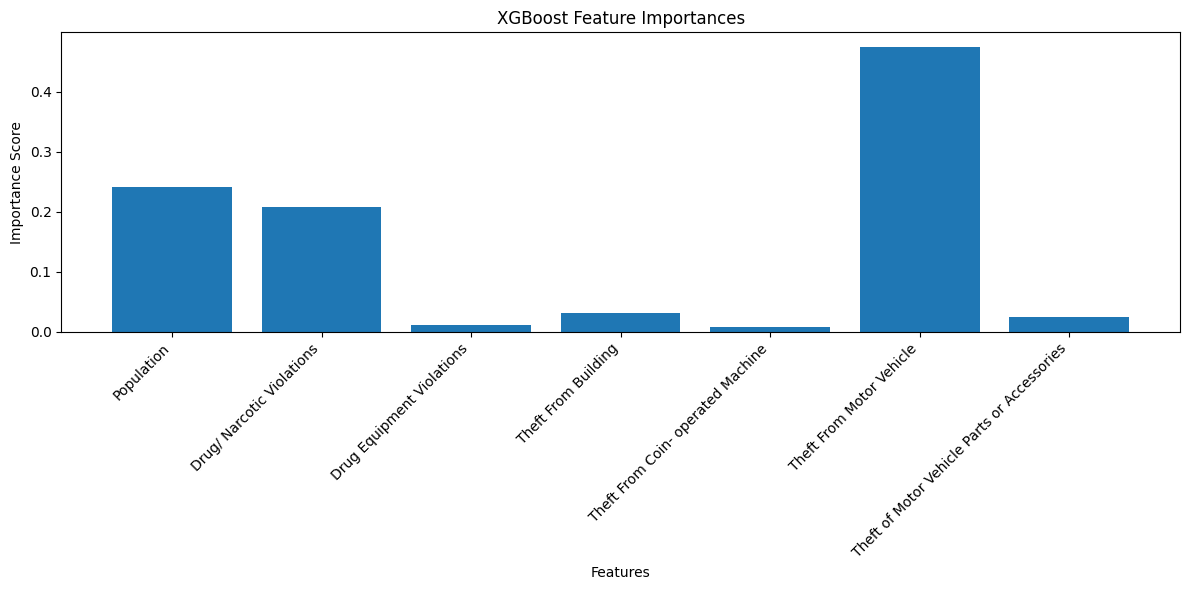

In [ ]:
importances = xgb_model.feature_importances_
feature_names = X_train_best.columns

plt.figure(figsize=(12, 6))
plt.bar(feature_names, importances)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('XGBoost Feature Importances')
plt.tight_layout()
plt.show()

> # **9- Conclusion**
---

**Data Modeling**
- After testing multiple models with hyperparameter tuning and K-Fold CrossValidation, we have found the best model to be XGBoost with custom set of parameters.
- The R2 Score, RMSE and MAE has beaten the best Linear Regression Model on the given training dataset
- Based on the Feature Importances generated from the trained xgboost model can see that Theft From Motor Vehicle and Drug/Narcotic Violations are imporant in predictions

> # **10- Reference**
---

- sklearn documentation
- pandas documentation